In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [35]:
# Step 1: Import the CSV files
census = pd.read_csv("C:/Users/user/Downloads/DSI/CEI v2/IL_census_data.csv")
business = pd.read_csv("C:/Users/user/Downloads/DSI/CEI v2/IL_business_data.csv")

# Step 2: Change column name in census DataFrame
census.rename(columns={"County Name": "Qualifying Name"}, inplace=True)

# Step 3: Combine census and business DataFrames using "Qualifying Name"
combined_df = pd.merge(census, business, on="Qualifying Name", how="inner")

for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Step 4: Import the shapefile and create a GeoDataFrame
bounds = gpd.read_file("C:/Users/user/Downloads/IL_BNDY_County/IL_BNDY_County_Py.shp")

#Step 5: Chane the column name of combined dataset
combined_df = combined_df.rename(columns={'County': 'CO_FIPS'})


In [36]:
# Step 6: Merge combined_df with bounds
merged_df = bounds.merge(combined_df, on="CO_FIPS")

In [50]:
# Create the merged GeoDataFrame using the original geometry column
merged_gdf = gpd.GeoDataFrame(merged_df, geometry=merged_df.geometry)

In [52]:
merged_gdf.to_csv("C:/Users/user/Downloads/DSI/CEI v2/comb.csv")

In [44]:
#variable of interest
cols = ['Population Density (Per Sq. Mile)', 'Total Population','Total Population: Male', 'Total Population: Female','Number of Employees for All Establishments', 'Number of All Establishments for All Sectors', 
        'Total Annual Payroll: All Establishments', 'Average Employee Wage: All Establishments', 
        'Number of All Establishments: Construction of Buildings', 'Number of All Establishments: Heavy and Civil Engineering Construction',
        'Number of All Establishments: Paper Manufacturing','All Establishments: Agriculture, Forestry, Fishing and Hunting',
       'Number of Employees for All Establishments: Utilities', 'Number of Employees for All Establishments: Specialty Trade Contractors',
        'Number of Establishments with 1 to 4 Employees: Total for All Sectors']

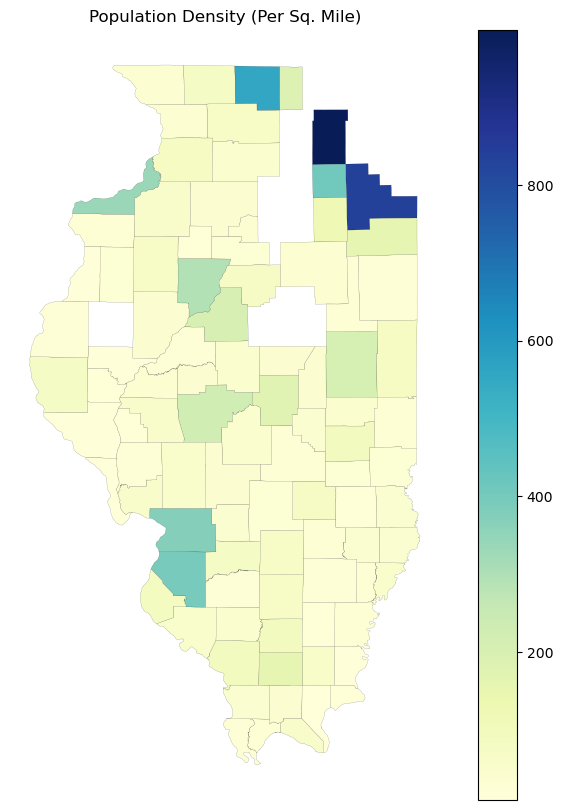

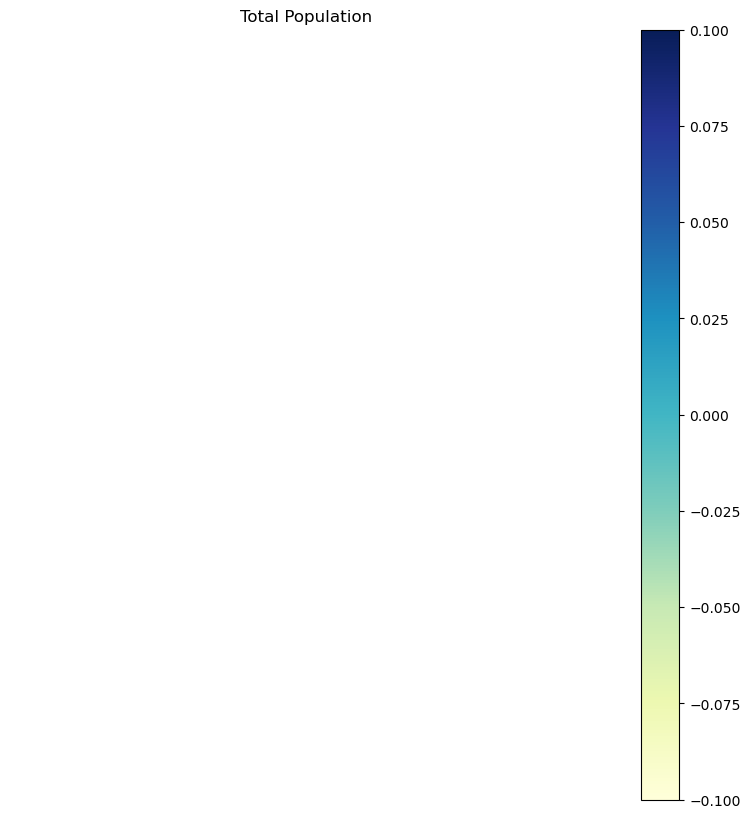

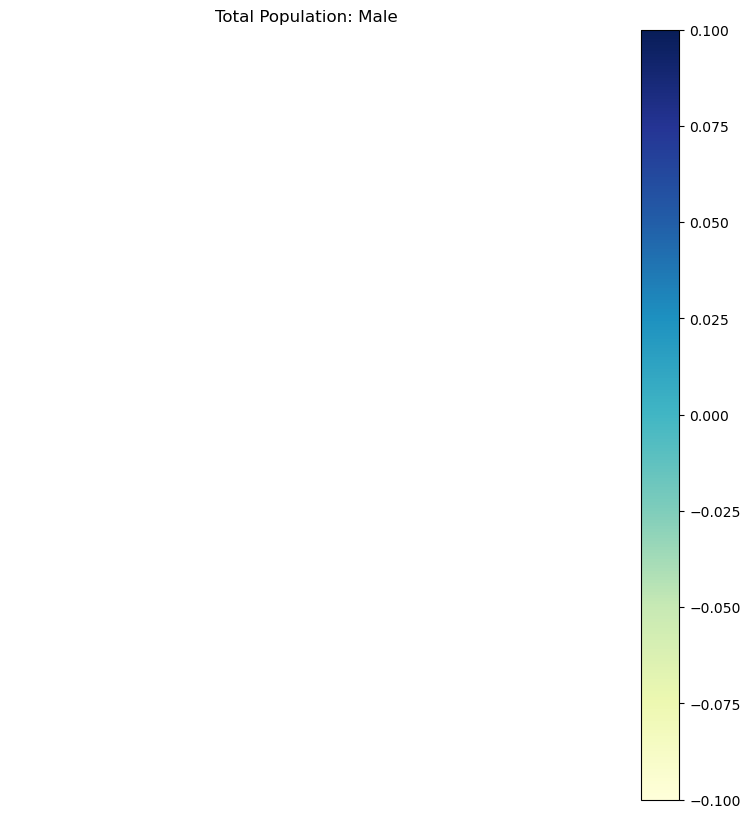

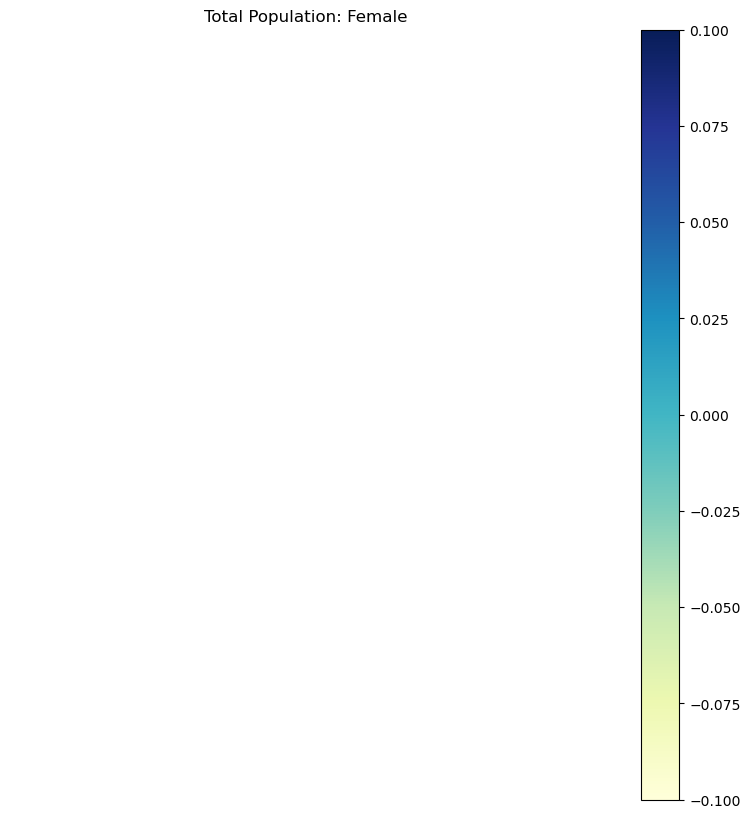

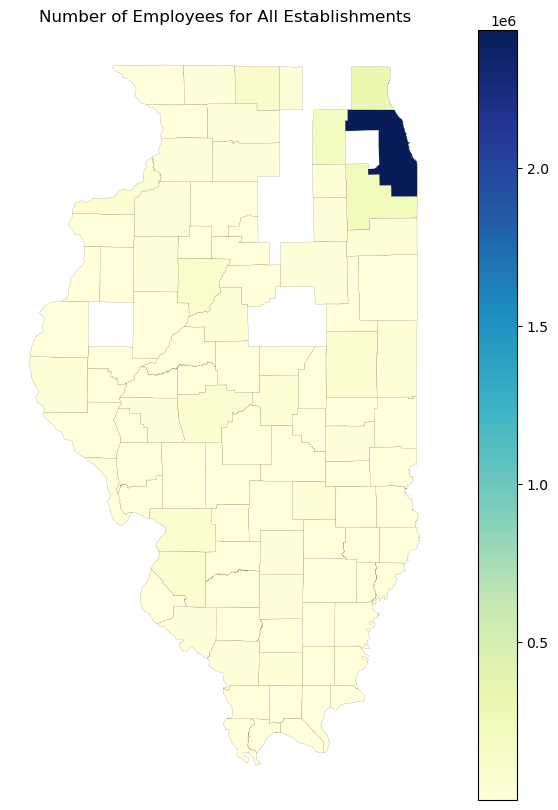

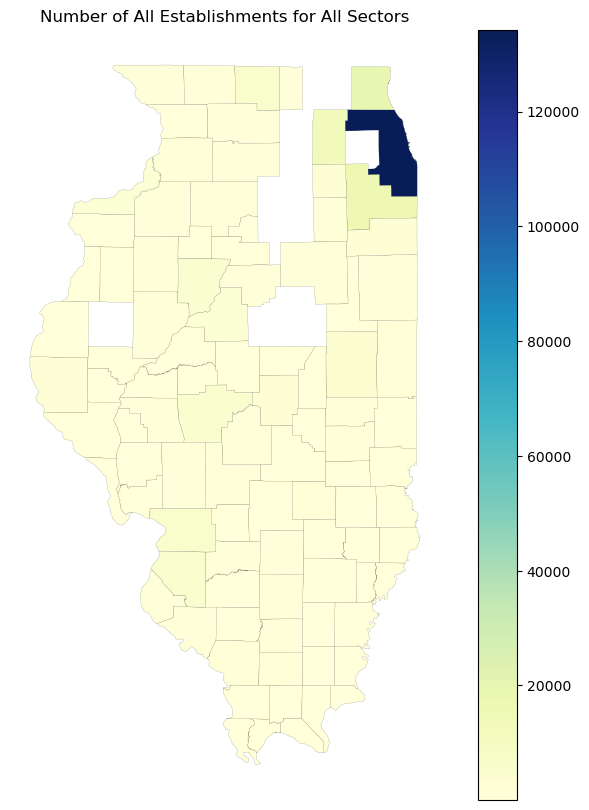

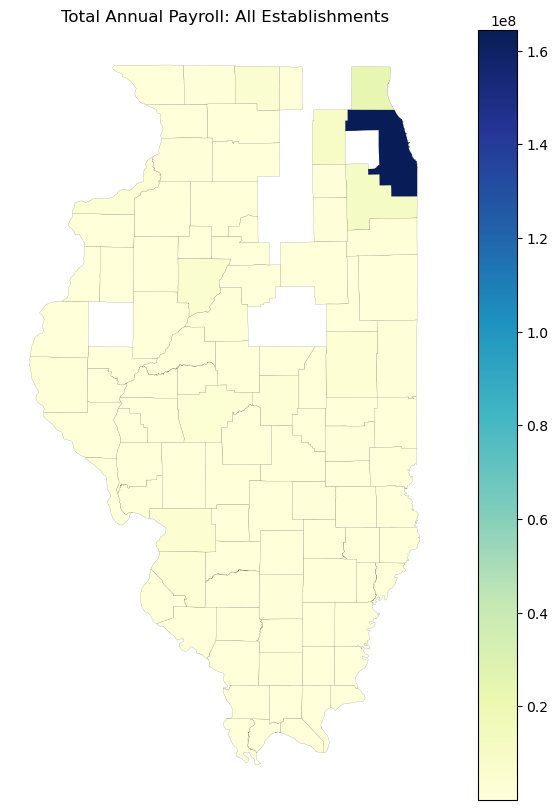

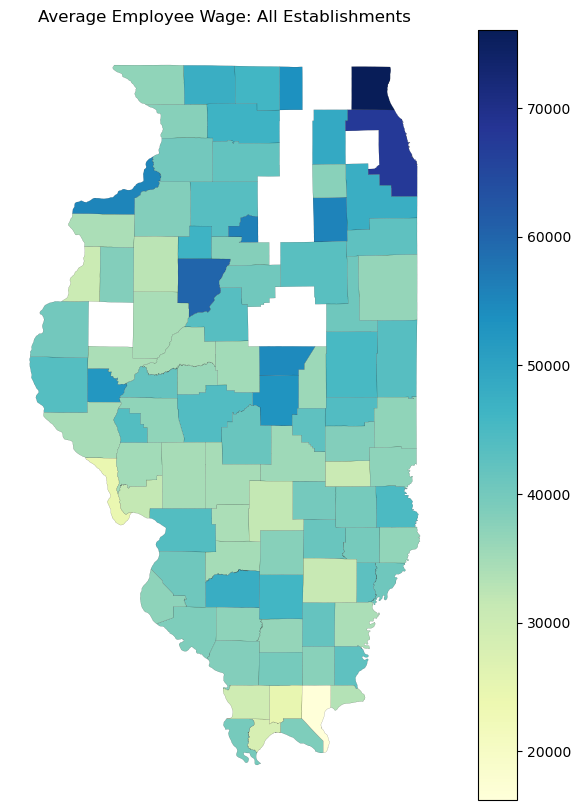

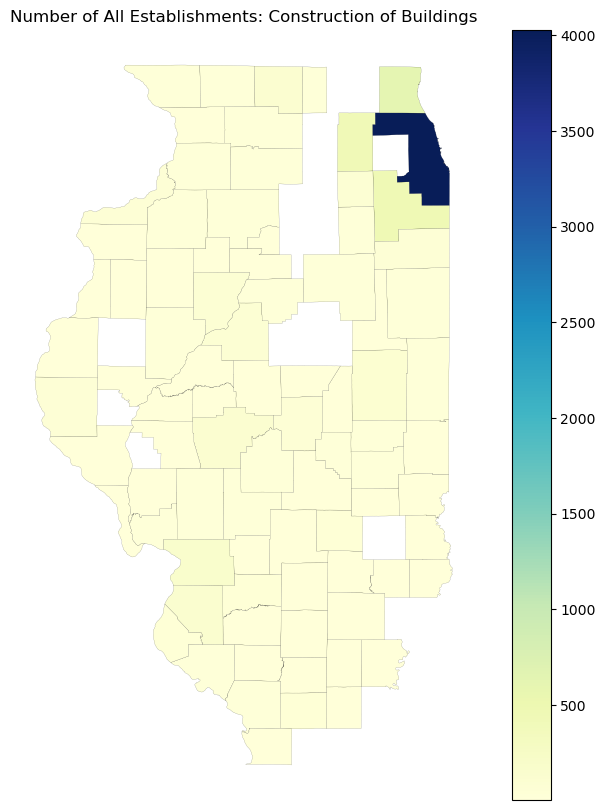

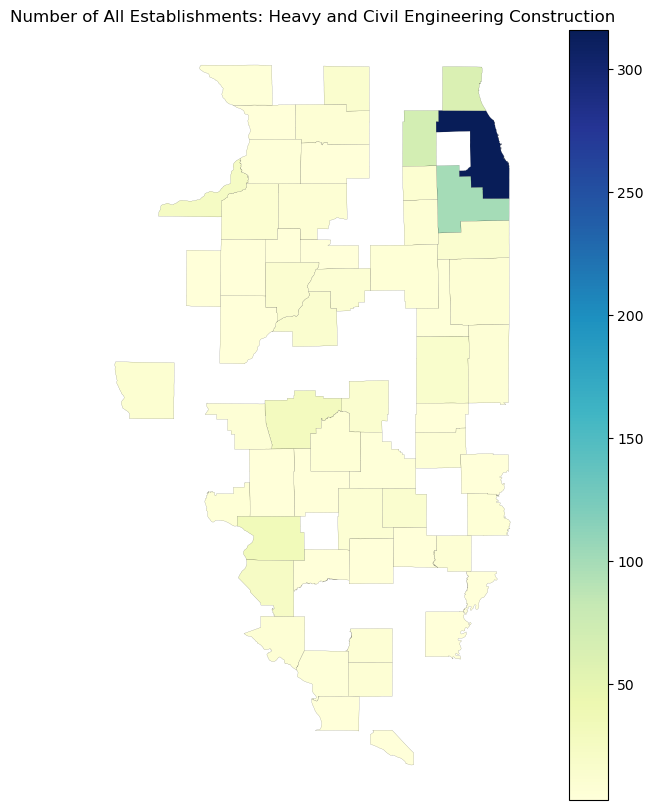

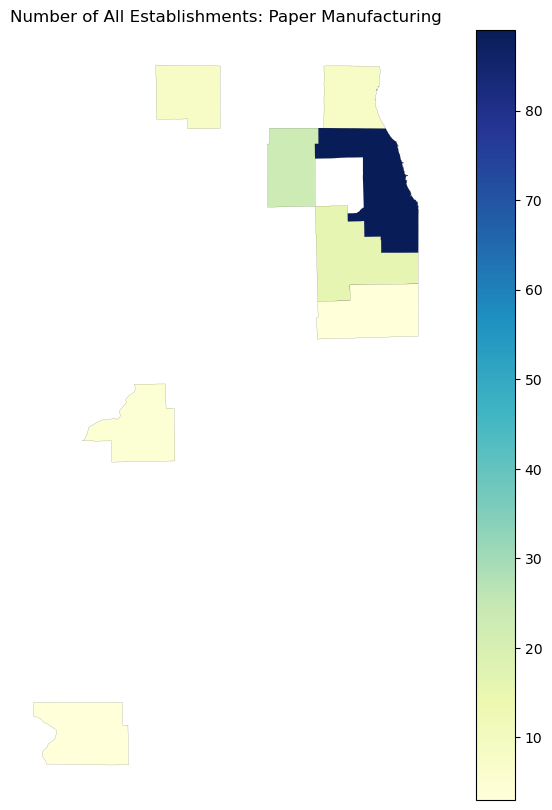

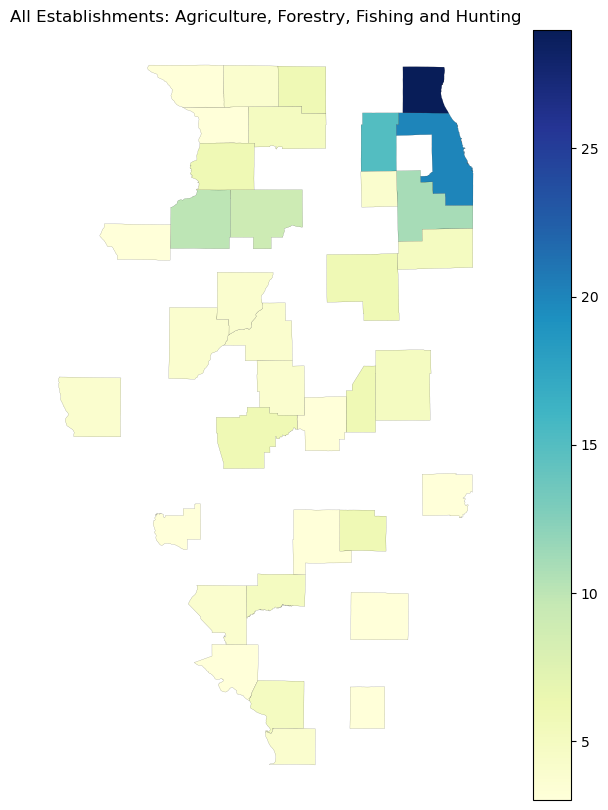

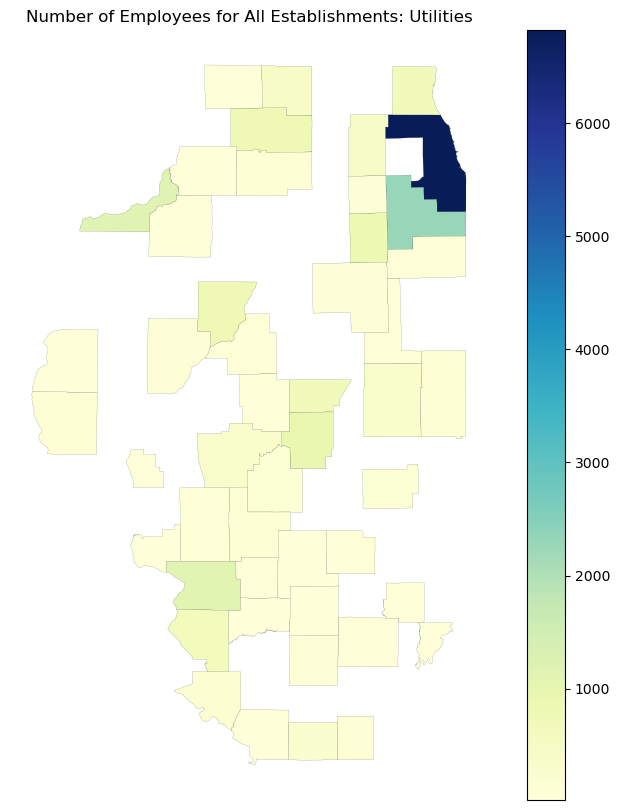

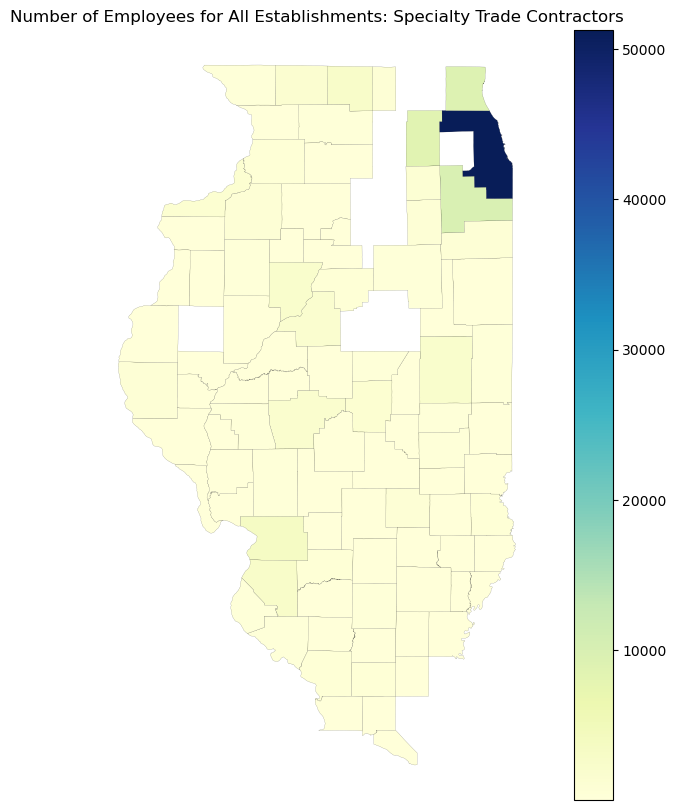

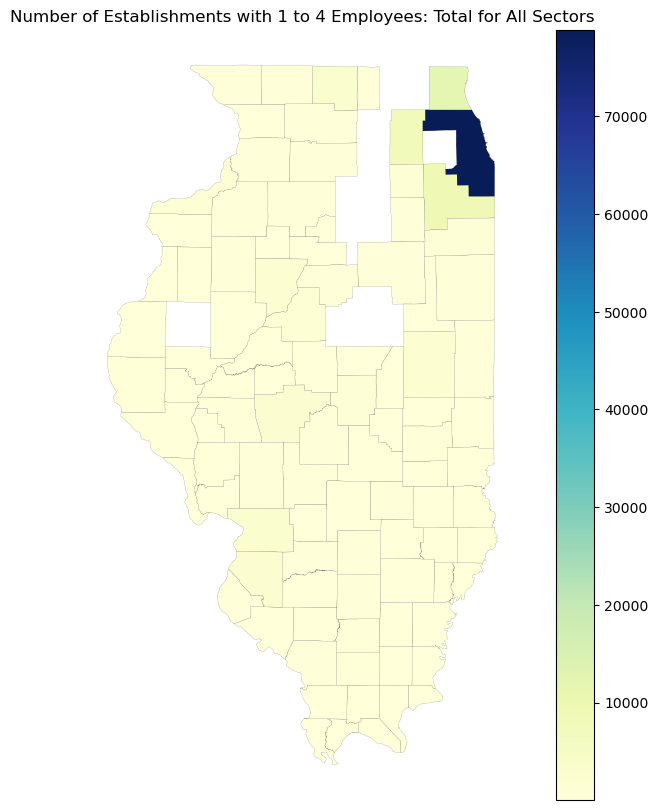

In [45]:
for col in cols:
    # Plot the heatmap of the 'population' column
    fig, ax = plt.subplots(figsize=(10, 10))

    merged_gdf.plot(column=col, cmap='YlGnBu', edgecolor='black', linewidth=0.08, ax=ax, legend=True)

    # Customize the plot
    ax.set_title(col)
    ax.axis('off')

    # Display the plot
    plt.show()